In [2]:
#import
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
%matplotlib inline

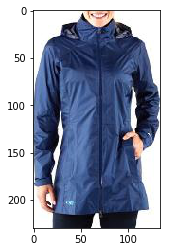

In [3]:
img_path = "gear_images/test_images/101634-Copy1.jpeg"
x = plt.imread(img_path)
plt.imshow(x)

(128, 128)


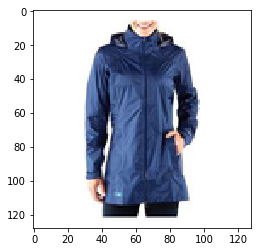

In [8]:
import math
x.shape
idealSize = 2**( math.floor(np.log2(max(x.shape[0], x.shape[1])))+1 )

pad = x.shape[0] - x.shape[1]

padX = idealSize - x.shape[0]
padY = idealSize - x.shape[1]

padx_before = padX//2
padx_after=  idealSize - padx_before - x.shape[0]

pady_before = padY//2
pady_after = idealSize - pady_before - x.shape[1]

newArr = np.pad(x, ((padx_before,padx_after),(pady_before,pady_after),(0,0)),mode='constant', constant_values=255)

img = Image.fromarray(newArr, 'RGB')
img2 = img.resize((128,128), Image.ANTIALIAS)
plt.imshow(img2)
print(img2.size)


(array([ 1888.,  3541.,  3740.,  3387.,  2553.,  1393.,  1171.,   574.,
          370., 30535.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

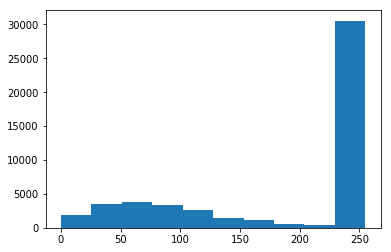

In [10]:
from skimage import exposure
img3 = np.asarray(img2)
plt.hist(img3.flatten())

In [100]:
# img4 = exposure.equalize_hist(img3)
# plt.hist(img4.flatten())

In [17]:
def normalize(arr):
    """
    Linear normalization
    http://en.wikipedia.org/wiki/Normalization_%28image_processing%29
    """
    arr = arr.astype('float')
    # Do not touch the alpha channel
    for i in range(3):
        minval = arr[...,i].min()
        print('mini' ,minval)
        maxval = arr[...,i].max()
        print(maxval)
        if minval != maxval:
            arr[...,i] -= minval
            arr[...,i] *= (255.0/(maxval-minval))
    return arr



mini 0.0
255.0
mini 0.0
255.0
mini 0.0
255.0


(array([ 1888.,  3541.,  3740.,  3387.,  2553.,  1393.,  1171.,   574.,
          370., 30535.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

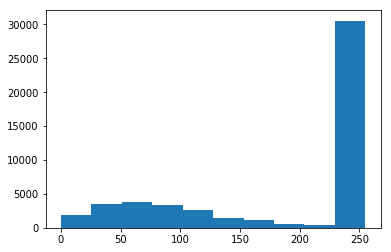

In [18]:
img5 = np.array(img3)
img5=  normalize(img5)
new_img = Image.fromarray(img5.astype('uint8'), 'RGB')
plt.hist(np.asarray(new_img).flatten())